In [1]:
#Project 
#First up linear regression.
import pylab as pl
%pylab inline
import numpy as np
import pandas as pd
from pandas import DataFrame, concat
import matplotlib.pyplot as plt
# Let us load the dataset. This one is tab delimited...
borrowers = pd.read_csv(u'./cs-training.csv')

Populating the interactive namespace from numpy and matplotlib


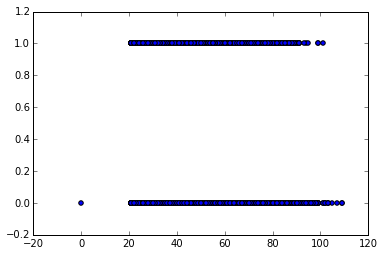

In [2]:
plt.scatter(borrowers['age'], borrowers['SeriousDlqin2yrs'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107c4b2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x107f8a690>]], dtype=object)

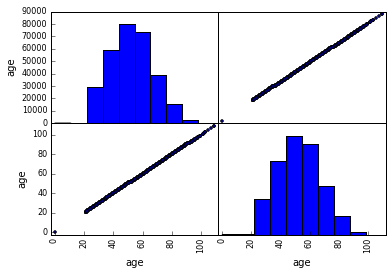

In [3]:
pd.scatter_matrix(borrowers[['age', 'age']])

In [5]:
borrowers[borrowers.age==0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1,0,1,0.436927,6000,6,0,2,0,2


In [6]:
borrowers.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [7]:
borrowers = borrowers.dropna()

In [8]:
borrowers.shape

(120269, 12)

In [43]:
# Let us create a logistic model instance
from sklearn import linear_model

logm = linear_model.LogisticRegression()
logm.set_params(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)

In [10]:
my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values

default_output = borrowers['SeriousDlqin2yrs'].values

default_output

array([1, 0, 0, ..., 0, 0, 0])

In [11]:
borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values

array([[  0.76612661,  45.        ,   2.        , ...,   6.        ,
          0.        ,   2.        ],
       [  0.95715102,  40.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.65818014,  38.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.29974515,  44.        ,   0.        , ...,   1.        ,
          0.        ,   2.        ],
       [  0.        ,  30.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.85028295,  64.        ,   0.        , ...,   2.        ,
          0.        ,   0.        ]])

In [12]:
# Let us fit the model

a=logm.fit(my_input, default_output)

In [13]:
logm.predict(my_input)

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
logm.score(my_input, default_output)

0.930622188593902

In [15]:
#output results
predictions = logm.predict_proba(my_input)[:,1]

submission = DataFrame({'Id':borrowers.icol(0), 'Probability':predictions})
submission.to_csv('Entry.csv', index=False)

In [16]:
borrowerstest = pd.read_csv(u'./cs-test.csv')

In [17]:
borrowerstest.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700,4,0,0,0,0
1,2,NaN,0.463295,57,0,0.527237,9141,15,0,4,0,2
2,3,NaN,0.043275,59,0,0.687648,5083,12,0,1,0,2
3,4,NaN,0.280308,38,1,0.925961,3200,7,0,2,0,0
4,5,NaN,1.000000,27,0,0.019917,3865,4,0,0,0,1


In [18]:
# Janitor work - let us rid na in some rows
borrowerstest = borrowerstest.fillna(0)
my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values

In [19]:
#output results
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [20]:
borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
NumberOfTime30-59DaysPastDueNotWorse,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
DebtRatio,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
MonthlyIncome,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
NumberOfTimes90DaysLate,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
NumberRealEstateLoansOrLines,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997
NumberOfTime60-89DaysPastDueNotWorse,-0.000955,-0.043501,0.980131,-0.001801,-0.011116,-0.061505,0.989277,-0.034118,1.000000,-0.005092
NumberOfDependents,0.002347,-0.206397,0.003538,0.009803,0.062647,0.038342,-0.003779,0.118997,-0.005092,1.000000


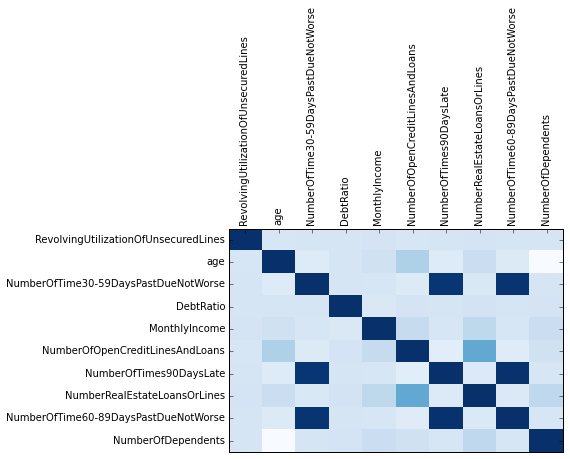

In [21]:
column_labels = ('RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents')
row_labels = ('RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents')
data = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].corr().values
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()


ax.set_xticklabels(row_labels, minor=False, rotation=90)
ax.set_yticklabels(column_labels, minor=False)

plt.show()

In [22]:
#remove correlated variables.

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfDependents']].values

default_output = borrowers['SeriousDlqin2yrs'].values

default_output

array([1, 0, 0, ..., 0, 0, 0])

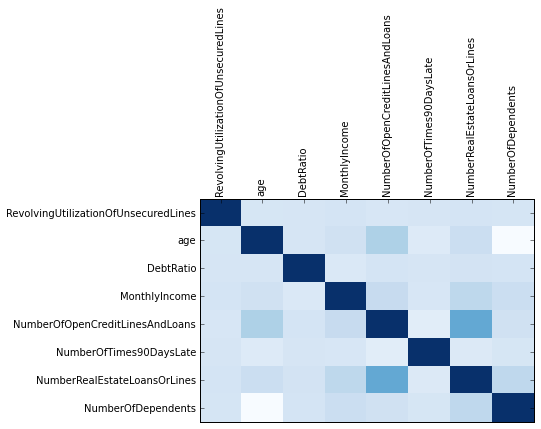

In [23]:
column_labels = ('RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfDependents')
row_labels = ('RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfDependents')
data = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfDependents']].corr().values
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()


ax.set_xticklabels(row_labels, minor=False, rotation=90)
ax.set_yticklabels(column_labels, minor=False)

plt.show()

In [24]:
a=logm.fit(my_input, default_output)
logm.score(my_input, default_output)

0.93066376206670043

In [25]:
my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfDependents']].values

In [26]:
#output results
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [27]:
logm.set_params(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)

In [5]:
from sklearn import datasets, metrics

In [6]:
# We import the Gaussian Naive Bayes module
from sklearn.naive_bayes import GaussianNB

In [7]:
# Create an instance of the classifiers
gnb = GaussianNB()

In [9]:
y_pred = gnb.fit(my_input, default_output).predict(my_input)


In [32]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
# Let's see how well we did
print 'Number of mislabelled points: {0}'.format((default_output != y_pred).sum())
print 'Out of: {0}'.format(((default_output == y_pred)+(default_output != y_pred)).sum())

Number of mislabelled points: 8890
Out of: 120269


In [34]:
(120269-8890)/120269.0

0.9260823653643083

In [35]:
gnb.score(my_input, default_output)

0.92608236536430832

In [36]:
# ROC
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)

In [37]:
default_output

array([1, 0, 0, ..., 0, 0, 0])

In [38]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [39]:
#?metrics.roc_curve

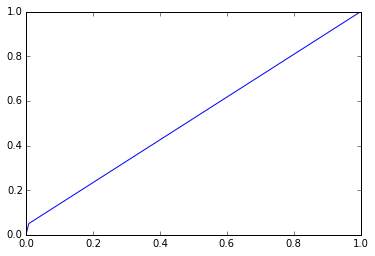

In [40]:
plt.plot(fpr, tpr)

In [41]:
fpr

array([ 0.        ,  0.00851562,  1.        ])

In [42]:
tpr

array([ 0.        ,  0.05025727,  1.        ])

In [43]:
metrics.confusion_matrix(default_output, y_pred)

array([[110959,    953],
       [  7937,    420]])

In [44]:
predictionstest= gnb.predict_proba(my_inputtest)[:,1]
#predictionstest
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109aaec10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b5404d0>]], dtype=object)

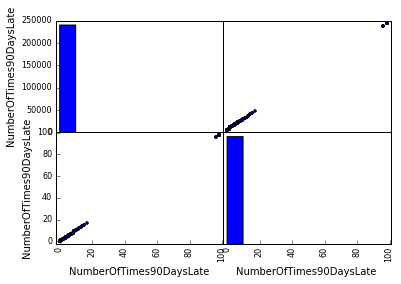

In [45]:
pd.scatter_matrix(borrowers[['NumberOfTimes90DaysLate', 'NumberOfTimes90DaysLate']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107c77090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e02a610>]], dtype=object)

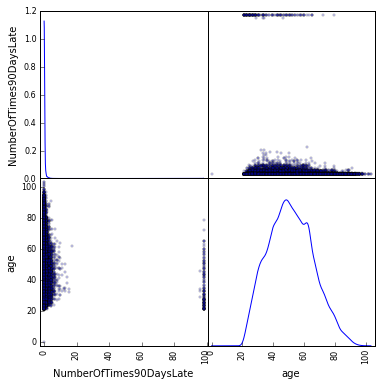

In [46]:
pd.scatter_matrix(borrowers[['NumberOfTimes90DaysLate', 'age']], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [47]:
#Lets try cleaning the data more and dropping outliers from the training set.
borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 97]

In [48]:
max(borrowers.NumberOfTimes90DaysLate)

96

In [49]:
borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]

In [50]:
max(borrowers.NumberOfTimes90DaysLate)

17

In [51]:
max(borrowers.age)

103

In [52]:
borrowers = borrowers[borrowers.age < 100]

In [53]:
max(borrowers.age)

99

In [54]:
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]

In [55]:
max(borrowers.NumberRealEstateLoansOrLines)


54

In [56]:
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 54]

In [57]:
max(borrowers.NumberRealEstateLoansOrLines)

32

In [58]:
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]

In [59]:
max(borrowers.NumberRealEstateLoansOrLines)

29

In [60]:
min(borrowers.age)

0

In [61]:
borrowers = borrowers[borrowers.age > 0]

In [62]:
min(borrowers.age)

21

In [63]:
borrowers = borrowers[borrowers.MonthlyIncome > 100]

In [64]:
min(borrowers.MonthlyIncome)

101.0

In [65]:
#remove correlated variables.

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfDependents']].values

default_output = borrowers['SeriousDlqin2yrs'].values

default_output

array([1, 0, 0, ..., 0, 0, 0])

In [66]:
a=logm.fit(my_input, default_output)
logm.score(my_input, default_output)

0.93567847808389393

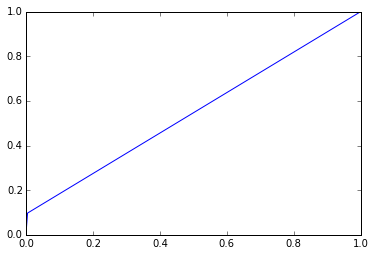

In [69]:
y_pred = a.predict(my_input)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

In [70]:
metrics.confusion_matrix(default_output, y_pred)

array([[108436,    518],
       [  6988,    753]])

In [71]:
#output results
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [72]:
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]

In [73]:


my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values

default_output = borrowers['SeriousDlqin2yrs'].values

default_output

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
a=logm.fit(my_input, default_output)
logm.score(my_input, default_output)

0.93722316077897405

In [77]:
metrics.confusion_matrix(default_output, a.predict(my_input))

array([[110374,    782],
       [  6687,   1134]])

In [78]:
#output results
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

ValueError: X has 8 features per sample; expecting 10

In [79]:
#restore two variables and also pre cleaned data for Naive Bayes
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values

default_output = borrowers['SeriousDlqin2yrs'].values

default_output

y_pred = gnb.fit(my_input, default_output).predict(my_input)

# Let's see how well we did
print 'Number of mislabelled points: {0}'.format((default_output != y_pred).sum())
print 'Out of: {0}'.format(((default_output == y_pred)+(default_output != y_pred)).sum())

Number of mislabelled points: 8491
Out of: 120269


In [80]:
gnb.score(my_input, default_output)

0.92939992849362674

In [81]:
metrics.confusion_matrix(default_output, y_pred)

array([[111544,    368],
       [  8123,    234]])

In [82]:
my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values
predictionstest= gnb.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [83]:
#What if we just assumed noone defaults!
(default_output == 1).sum()

8357

In [84]:
(120269-8357)/120269.0

0.930514097564626

In [85]:
#Naive Bayes with cleaned data
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values

default_output = borrowers['SeriousDlqin2yrs'].values

default_output
y_pred = gnb.fit(my_input, default_output).predict(my_input)

# Let's see how well we did
print 'Number of mislabelled points: {0}'.format((default_output != y_pred).sum())
print 'Out of: {0}'.format(((default_output == y_pred)+(default_output != y_pred)).sum())

Number of mislabelled points: 11078
Out of: 118977


In [86]:
gnb.score(my_input, default_output)

0.9068895668910798

In [88]:
metrics.confusion_matrix(default_output, y_pred)

array([[104272,   6884],
       [  4194,   3627]])

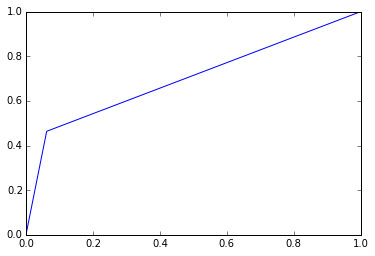

In [89]:
#y_pred = a.predict(my_input)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

In [91]:
my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].values
predictionstest= gnb.predict_proba(my_inputtest)[:,1]
predictionstest
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
#submission.to_csv('Entry.csv', index=False)

In [92]:
# now try to create another variable to deal with the 96s and 98s
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
#borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]
borrowers['LateOthers90'] = 5#just initialising it
borrowers['LateRefusedToSay90'] = 5
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowers
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowers.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowers.columns = names

### Now create more dummy variables.
borrowers['LateOthers60'] = 5
borrowers['LateRefusedToSay60'] = 5
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowers

borrowers['LateOthers30'] = 5
borrowers['LateRefusedToSay30'] = 5
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowers

#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30' ]].values

default_output = borrowers['SeriousDlqin2yrs'].values

a=logm.fit(my_input, default_output)
logm.score(my_input, default_output)

0.93676390346274918

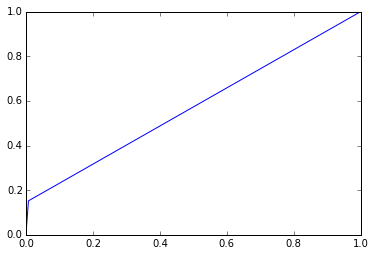

In [93]:
y_pred = a.predict(my_input)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

In [94]:
metrics.confusion_matrix(default_output, y_pred)

array([[110390,    830],
       [  6703,   1202]])

In [95]:
max(borrowers.NumberOfTimes90DaysLate)

17

In [96]:
metrics.confusion_matrix(default_output, a.predict(my_input))

array([[110390,    830],
       [  6703,   1202]])

In [97]:
#output results
borrowerstest = pd.read_csv(u'./cs-test.csv')
borrowerstest = borrowerstest.fillna(0)

borrowerstest['LateOthers90'] = 5#just initialising it
borrowerstest['LateRefusedToSay90'] = 5
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowerstest
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowerstest.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowerstest.columns = names

### Now create more dummy variables.
borrowerstest['LateOthers60'] = 5
borrowerstest['LateRefusedToSay60'] = 5
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest

borrowerstest['LateOthers30'] = 5
borrowerstest['LateRefusedToSay30'] = 5
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest




my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30' ]].values
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [98]:
max(borrowers[['Num3059DaysPastDueNotWorse']].values)
#borrowers = borrowers[borrowers[['Num3059DaysPastDueNotWorse']].values < 96]

array([13])

In [99]:
max(borrowers[['NumberOfTimes90DaysLate']].values)


array([17])

In [100]:
max(borrowers[['Num6089DaysPastDueNotWorse']].values)


array([11])

In [101]:
max(borrowers[['Num3059DaysPastDueNotWorse']].values)

array([13])

In [102]:
#borrowers = borrowers[borrowers[['NumberOfTime30-59DaysPastDueNotWorse']].values < 13]
max(borrowers[['Num3059DaysPastDueNotWorse']].values)

array([13])

In [103]:
borrowers.loc[borrowers['SeriousDlqin2yrs'] == 0].loc[borrowers['DebtRatio'] > 50].shape
#borrowers.loc[borrowers['DebtRatio'] > 1]

(1713, 18)

In [104]:
names

['Unnamed: 0',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'Num3059DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'Num6089DaysPastDueNotWorse',
 'NumberOfDependents',
 'LateOthers90',
 'LateRefusedToSay90']

In [105]:
# now try to create another variable to deal with the 96s and 98s
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
#borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]
borrowers['LateOthers90'] = 5#just initialising it
#borrowers['LateRefusedToSay90'] = 5
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'LateOthers90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 98,'LateOthers90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowers
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowers.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowers.columns = names

### Now create more dummy variables.
borrowers['LateOthers60'] = 5
#borrowers['LateRefusedToSay60'] = 5
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'LateOthers60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 98,'LateOthers60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowers

borrowers['LateOthers30'] = 5
#borrowers['LateRefusedToSay30'] = 5
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'LateOthers30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 98,'LateOthers30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowers

#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90','LateOthers60','LateOthers30' ]].values

default_output = borrowers['SeriousDlqin2yrs'].values

a=logm.fit(my_input, default_output)
logm.score(my_input, default_output)


0.93660440713536197

In [106]:
#output results
borrowerstest = pd.read_csv(u'./cs-test.csv')
borrowerstest = borrowerstest.fillna(0)

borrowerstest['LateOthers90'] = 5#just initialising it
#borrowerstest['LateRefusedToSay90'] = 5
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'LateOthers90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 98,'LateOthers90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowerstest
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowerstest.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowerstest.columns = names

### Now create more dummy variables.
borrowerstest['LateOthers60'] = 5
#borrowerstest['LateRefusedToSay60'] = 5
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'LateOthers60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 98,'LateOthers60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest

borrowerstest['LateOthers30'] = 5
#borrowerstest['LateRefusedToSay30'] = 5
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'LateOthers30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 98,'LateOthers30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest




my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90','LateOthers60','LateOthers30' ]].values
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [107]:
borrowers.loc[borrowers['SeriousDlqin2yrs'] == 0].loc[borrowers['DebtRatio'] > 50].shape

(1713, 15)

In [108]:
borrowers.loc[borrowers['SeriousDlqin2yrs'] == 1].loc[borrowers['DebtRatio'] > 50].shape

(71, 15)

In [109]:
71.0/(1713+71)

0.0397982062780269

In [110]:
borrowers.loc[borrowers['SeriousDlqin2yrs'] == 0].loc[borrowers['DebtRatio'] > 1].shape

(6456, 15)

In [111]:
borrowers.loc[borrowers['SeriousDlqin2yrs'] == 1].loc[borrowers['DebtRatio'] > 1].shape

(708, 15)

In [112]:
708.0/(6456+708)

0.09882747068676717

In [114]:
#borrowers.loc[borrowers['SeriousDlqin2yrs'] == 0].loc[borrowers['DebtRatio'] > 50]

In [44]:
# now lets try creating a seprate variable when debt ratio is an integer
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
#borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]
borrowers['LateOthers90'] = 5#just initialising it
borrowers['LateRefusedToSay90'] = 5
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowers
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowers.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowers.columns = names

### Now create more dummy variables.
borrowers['LateOthers60'] = 5
borrowers['LateRefusedToSay60'] = 5
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowers

borrowers['LateOthers30'] = 5
borrowers['LateRefusedToSay30'] = 5
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowers

#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers

borrowers['debtratioanint'] = 1
borrowers.ix[borrowers.DebtRatio%1 == 0,'debtratioanint'] = 1; borrowers
borrowers.ix[borrowers.DebtRatio%1 != 0,'debtratioanint'] = 0; borrowers
#borrowers.ix[borrowers.DebtRatio == 0,'debtratioanint'] = 0; borrowers

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30','debtratioanint']].values

default_output = borrowers['SeriousDlqin2yrs'].values

a=logm.fit(my_input, default_output)
logm.score(my_input, default_output)

0.93681427072402934

In [45]:
#borrowers.loc[borrowers['DebtRatio']%1 ==0]

In [46]:
#output results
borrowerstest = pd.read_csv(u'./cs-test.csv')
borrowerstest = borrowerstest.fillna(0)

borrowerstest['LateOthers90'] = 5#just initialising it
borrowerstest['LateRefusedToSay90'] = 5
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowerstest
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowerstest.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowerstest.columns = names

### Now create more dummy variables.
borrowerstest['LateOthers60'] = 5
borrowerstest['LateRefusedToSay60'] = 5
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest

borrowerstest['LateOthers30'] = 5
borrowerstest['LateRefusedToSay30'] = 5
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest


borrowerstest['debtratioanint'] = 1
borrowerstest.ix[borrowerstest.DebtRatio%1 == 0,'debtratioanint'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.DebtRatio%1 != 0,'debtratioanint'] = 0; borrowerstest
#borrowerstest.ix[borrowerstest.DebtRatio == 0,'debtratioanint'] = 0; borrowerstest

my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30','debtratioanint']].values
predictionstest = logm.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

In [47]:
#great so that gives me 0.851183 best score yet. Note that zero is considered an int

In [48]:
#Cross Validation
# We would like to create out training set 
n = int(len(default_output) * 0.7)

In [49]:
# Stack array in sequence horizointally with hstack
ind = np.hstack( (np.ones(n, dtype=np.bool), np.zeros(len(default_output) - n, dtype=np.bool) ) )

In [50]:
ind

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [51]:
np.random.shuffle(ind)
ind

array([ True,  True, False, ...,  True,  True,  True], dtype=bool)

In [52]:
# we can create our training and testing set 
X_train, X_test = my_input[ind], my_input[ind==False]
Y_train, Y_test = default_output[ind], default_output[ind==False]

In [53]:
# Let us do the magic!
logm.fit(X_train, Y_train)
logm.score(X_test, Y_test) 

0.93779730259107952

In [54]:
#Application of cross validation
#The work in class showed that with 21 neighbors, we can get an 
#ideal result that doesnt overfit the data. To verify this, we'll use 
#cross validation
scores=[]

In [57]:
for k in range(5):
    np.random.shuffle(ind)
    X_train, X_test = my_input[ind],my_input[ind==False]
    Y_train, Y_test = default_output[ind],default_output[ind==False]
    logm.fit(X_train, Y_train)
    scores.append(logm.score(X_test, Y_test))
    predictionstest = logm.predict_proba(my_inputtest)[:,1]
    submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
    submission.to_csv('Entry'+str(k)+'.csv', index=False)
    y_pred = logm.predict(X_test)
    print metrics.confusion_matrix(Y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)

[[33084   235]
 [ 2082   337]]
[[33117   248]
 [ 2017   356]]
[[33176   236]
 [ 1980   346]]
[[33171   254]
 [ 1947   366]]
[[33129   229]
 [ 2010   370]]


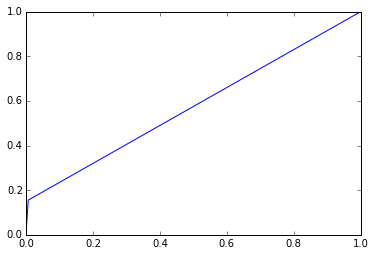

In [58]:
plt.plot(fpr, tpr)

In [56]:
print scores

[0.93796519111310095, 0.9383009681571437, 0.93561475180480158, 0.93645419441490851, 0.9358106217471599]


In [128]:
print np.mean(scores)

0.937220885332


In [129]:
y_pred = logm.predict(my_input)
# ROC
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)

In [130]:
metrics.confusion_matrix(default_output, y_pred)

array([[110375,    845],
       [  6686,   1219]])

In [131]:
tpr

array([ 0.       ,  0.1542062,  1.       ])

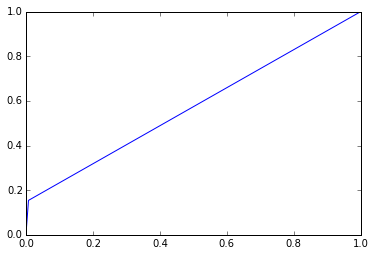

In [132]:
plt.plot(fpr, tpr)

Populating the interactive namespace from numpy and matplotlib
DecisionTree with features [0, 1] has a score of 0.985863588667
RandomForest with 30 estimators with features [0, 1] has a score of 0.982488982162
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.985863588667
AdaBoost with 30 estimators with features [0, 1] has a score of 0.985863588667
DecisionTree with features [0, 2] has a score of 0.984998950682
RandomForest with 30 estimators with features [0, 2] has a score of 0.981876180483
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.98506610703
AdaBoost with 30 estimators with features [0, 2] has a score of 0.984998950682
DecisionTree with features [2, 3] has a score of 0.956566631689
RandomForest with 30 estimators with features [2, 3] has a score of 0.956256033578
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.968419727177
AdaBoost with 30 estimators with features [2, 3] has a score of 0.956566631689


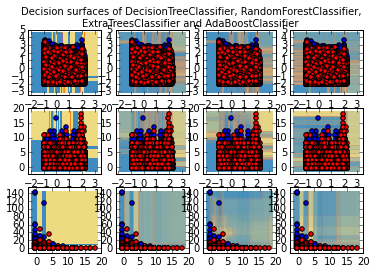

In [387]:
#Ensemble Techniques

import numpy as np
import pylab as pl
%pylab inline

from sklearn import clone
#from sklearn.datasets import load_iris

from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.forest import (RandomForestClassifier, ExtraTreesClassifier)

from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "bry"
plot_step = 0.02

# Load data
#iris = load_iris()

plot_idx = 1

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in (DecisionTreeClassifier(), RandomForestClassifier(n_estimators=n_estimators), ExtraTreesClassifier(n_estimators=n_estimators), AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=n_estimators)):
        # We only take the two corresponding features
        X = my_input[:, pair]
        y = default_output
        
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        # Standardize... Doesnt have to be done but
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        # Train
        clf = model.fit(X, y)
        
        # Get accuracy scores
        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print model_details + " with features", pair, "has a score of", scores
        
        # Plot the decision boundary
        pl.subplot(3, 4, plot_idx)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired)
        else:
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = pl.contourf(xx, yy, Z, alpha=0.1, cmap=pl.cm.Paired)
        pl.axis("tight")
        
        # Plot the training points
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            pl.scatter(X[idx, 0], X[idx, 1], c=c, label=borrowers.columns[i], cmap=pl.cm.Paired)
        pl.axis("tight")
        
        plot_idx += 1

pl.suptitle("Decision surfaces of DecisionTreeClassifier, ""RandomForestClassifier,\nExtraTreesClassifier"" and AdaBoostClassifier")
pl.show()

In [1]:
#Project 
#First up linear regression.
import pylab as pl
%pylab inline
import numpy as np
import pandas as pd
from pandas import DataFrame, concat
import matplotlib.pyplot as plt
# Let us load the dataset. This one is tab delimited...
borrowers = pd.read_csv(u'./cs-training.csv')

from sklearn import datasets, metrics

# We import the Gaussian Naive Bayes module
from sklearn.naive_bayes import GaussianNB

# Create an instance of the classifiers
gnb = GaussianNB()

# Now change to gnb
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
#borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]
borrowers['LateOthers90'] = 5#just initialising it
borrowers['LateRefusedToSay90'] = 5
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowers
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowers.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowers.columns = names

### Now create more dummy variables.
borrowers['LateOthers60'] = 5
borrowers['LateRefusedToSay60'] = 5
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowers

borrowers['LateOthers30'] = 5
borrowers['LateRefusedToSay30'] = 5
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowers

#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers

borrowers['debtratioanint'] = 1
borrowers.ix[borrowers.DebtRatio%1 == 0,'debtratioanint'] = 1; borrowers
borrowers.ix[borrowers.DebtRatio%1 != 0,'debtratioanint'] = 0; borrowers
#borrowers.ix[borrowers.DebtRatio == 0,'debtratioanint'] = 0; borrowers

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30','debtratioanint']].values

default_output = borrowers['SeriousDlqin2yrs'].values

#a=logm.fit(my_input, default_output)
#logm.score(my_input, default_output)
y_pred = gnb.fit(my_input, default_output).predict(my_input)

Populating the interactive namespace from numpy and matplotlib


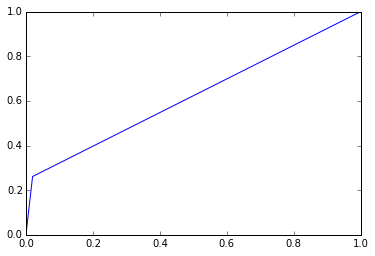

In [2]:
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

In [3]:
print metrics.confusion_matrix(default_output, y_pred)

[[109013   2207]
 [  5841   2064]]


In [4]:
#output results (change to gnb)
borrowerstest = pd.read_csv(u'./cs-test.csv')
borrowerstest = borrowerstest.fillna(0)

borrowerstest['LateOthers90'] = 5#just initialising it
borrowerstest['LateRefusedToSay90'] = 5
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowerstest
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowerstest.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowerstest.columns = names

### Now create more dummy variables.
borrowerstest['LateOthers60'] = 5
borrowerstest['LateRefusedToSay60'] = 5
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest

borrowerstest['LateOthers30'] = 5
borrowerstest['LateRefusedToSay30'] = 5
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest


borrowerstest['debtratioanint'] = 1
borrowerstest.ix[borrowerstest.DebtRatio%1 == 0,'debtratioanint'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.DebtRatio%1 != 0,'debtratioanint'] = 0; borrowerstest
#borrowerstest.ix[borrowerstest.DebtRatio == 0,'debtratioanint'] = 0; borrowerstest

my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30','debtratioanint']].values
#predictionstest = logm.predict_proba(my_inputtest)[:,1]
predictionstest = gnb.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('Entry.csv', index=False)

Populating the interactive namespace from numpy and matplotlib
AdaBoost with 30 estimators has a score of 0.999983210913
[[111219      1]
 [     1   7904]]


`%matplotlib` prevents importing * from pylab and numpy


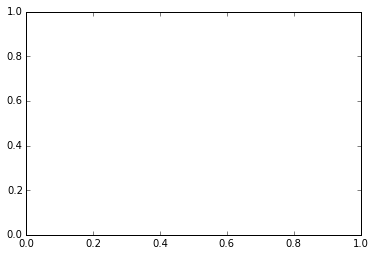

In [40]:
#Ensemble Techniques

import numpy as np
import pylab as pl
%pylab inline

from sklearn import clone
#from sklearn.datasets import load_iris

from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.forest import (RandomForestClassifier, ExtraTreesClassifier)

from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "bry"
plot_step = 0.02

# Load data
#iris = load_iris()

plot_idx = 1

#for pair in ([0, 1], [0, 2], [2, 3]):
    #for model in (DecisionTreeClassifier()):
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=n_estimators)
# We only take the two corresponding features
X = my_input
y = default_output

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]



# Train
clf = model.fit(X, y)

# Get accuracy scores
scores = clf.score(X, y)
# Create a title for each column and the console by using str() and slicing away useless parts of the string
model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(len(model.estimators_))
print model_details + " has a score of", scores

predictionstest = model.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryADA.csv', index=False)
y_pred = model.predict(my_input)
print metrics.confusion_matrix(default_output, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

[[32203  1167]
 [ 1862   506]]


[0.91524427779954109]

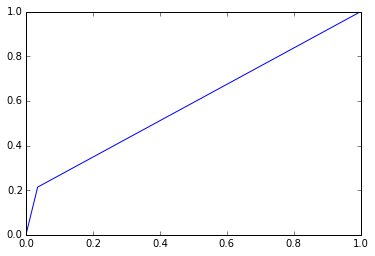

In [41]:
#Cross Validation
# We would like to create out training set 
n = int(len(default_output) * 0.7)
# Stack array in sequence horizointally with hstack
ind = np.hstack( (np.ones(n, dtype=np.bool), np.zeros(len(default_output) - n, dtype=np.bool) ) )
np.random.shuffle(ind)
# we can create our training and testing set 
X_train, X_test = my_input[ind], my_input[ind==False]
Y_train, Y_test = default_output[ind], default_output[ind==False]
# Let us do the magic!
model.fit(X_train, Y_train)
model.score(X_test, Y_test) 
#Application of cross validation
#The work in class showed that with 21 neighbors, we can get an 
#ideal result that doesnt overfit the data. To verify this, we'll use 
#cross validation
scores=[]
#for k in range(5):
k=1
np.random.shuffle(ind)
X_train, X_test = my_input[ind],my_input[ind==False]
Y_train, Y_test = default_output[ind],default_output[ind==False]
model.fit(X_train, Y_train)
scores.append(model.score(X_test, Y_test))
predictionstest = model.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryADA'+str(k)+'.csv', index=False)
y_pred = model.predict(X_test)
print metrics.confusion_matrix(Y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr)
scores

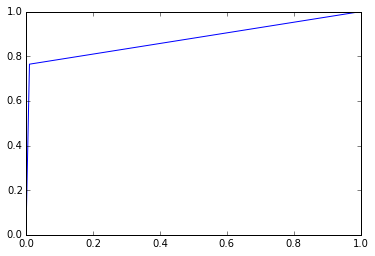

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

In [23]:
scores


[0.91524427779954109]

Populating the interactive namespace from numpy and matplotlib
DecisionTree has a score of 0.999983210913
[[111219      1]
 [     1   7904]]


`%matplotlib` prevents importing * from pylab and numpy


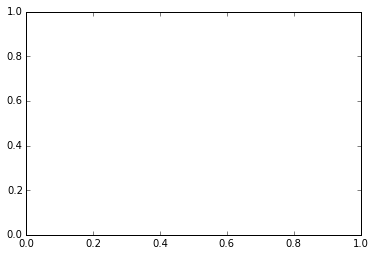

In [38]:
#Ensemble Techniques

import numpy as np
import pylab as pl
%pylab inline

from sklearn import clone
#from sklearn.datasets import load_iris

from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.forest import (RandomForestClassifier, ExtraTreesClassifier)

from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "bry"
plot_step = 0.02

# Load data
#iris = load_iris()

plot_idx = 1

#for pair in ([0, 1], [0, 2], [2, 3]):
    #for model in (DecisionTreeClassifier()):
model = DecisionTreeClassifier()
# We only take the two corresponding features
X = my_input
y = default_output

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]


# Train
clf = model.fit(X, y)

# Get accuracy scores
scores = clf.score(X, y)
# Create a title for each column and the console by using str() and slicing away useless parts of the string
model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(len(model.estimators_))
print model_details + " has a score of", scores

predictionstest = model.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryDecTree.csv', index=False)
y_pred = model.predict(my_input)
print metrics.confusion_matrix(default_output, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

[[31332  2019]
 [ 1784   603]]


[0.89358665845878338]

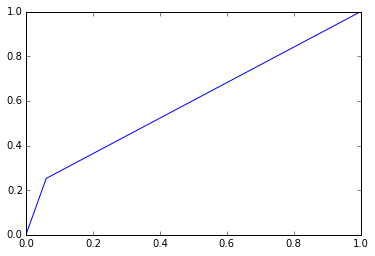

In [39]:
#Cross Validation
# We would like to create out training set 
n = int(len(default_output) * 0.7)
# Stack array in sequence horizointally with hstack
ind = np.hstack( (np.ones(n, dtype=np.bool), np.zeros(len(default_output) - n, dtype=np.bool) ) )
np.random.shuffle(ind)
# we can create our training and testing set 
X_train, X_test = my_input[ind], my_input[ind==False]
Y_train, Y_test = default_output[ind], default_output[ind==False]
# Let us do the magic!
model.fit(X_train, Y_train)
model.score(X_test, Y_test) 
#Application of cross validation
#The work in class showed that with 21 neighbors, we can get an 
#ideal result that doesnt overfit the data. To verify this, we'll use 
#cross validation
scores=[]
#for k in range(5):
k=1
np.random.shuffle(ind)
X_train, X_test = my_input[ind],my_input[ind==False]
Y_train, Y_test = default_output[ind],default_output[ind==False]
model.fit(X_train, Y_train)
scores.append(model.score(X_test, Y_test))
predictionstest = model.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryDecTree'+str(k)+'.csv', index=False)
y_pred = model.predict(X_test)
print metrics.confusion_matrix(Y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr)
scores

Populating the interactive namespace from numpy and matplotlib
RandomForest with 30 estimators has a score of 0.998044071354
[[111218      2]
 [   231   7674]]


`%matplotlib` prevents importing * from pylab and numpy


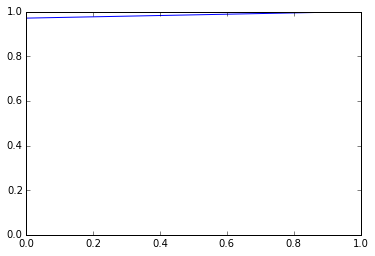

In [37]:


#Ensemble Techniques

import numpy as np
import pylab as pl
%pylab inline

from sklearn import clone
#from sklearn.datasets import load_iris

from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.forest import (RandomForestClassifier, ExtraTreesClassifier)

from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "bry"
plot_step = 0.02

# Load data
#iris = load_iris()

plot_idx = 1

#for pair in ([0, 1], [0, 2], [2, 3]):
    #for model in (DecisionTreeClassifier()):
model = RandomForestClassifier(n_estimators=n_estimators)
# We only take the two corresponding features
X = my_input
y = default_output

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]


# Train
clf = model.fit(X, y)

# Get accuracy scores
scores = clf.score(X, y)
# Create a title for each column and the console by using str() and slicing away useless parts of the string
model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(len(model.estimators_))
print model_details + " has a score of", scores

predictionstest = model.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryDecTree.csv', index=False)
y_pred = model.predict(my_input)
print metrics.confusion_matrix(default_output, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)

[[33056   300]
 [ 2038   344]]


[0.93457943925233644]

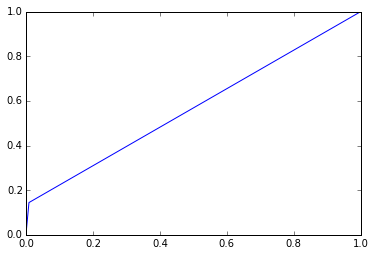

In [36]:
#Cross Validation
# We would like to create out training set 
n = int(len(default_output) * 0.7)
# Stack array in sequence horizointally with hstack
ind = np.hstack( (np.ones(n, dtype=np.bool), np.zeros(len(default_output) - n, dtype=np.bool) ) )
np.random.shuffle(ind)
# we can create our training and testing set 
X_train, X_test = my_input[ind], my_input[ind==False]
Y_train, Y_test = default_output[ind], default_output[ind==False]
# Let us do the magic!
model.fit(X_train, Y_train)
model.score(X_test, Y_test) 
#Application of cross validation
#The work in class showed that with 21 neighbors, we can get an 
#ideal result that doesnt overfit the data. To verify this, we'll use 
#cross validation
scores=[]
#for k in range(5):
k=1
np.random.shuffle(ind)
X_train, X_test = my_input[ind],my_input[ind==False]
Y_train, Y_test = default_output[ind],default_output[ind==False]
model.fit(X_train, Y_train)
scores.append(model.score(X_test, Y_test))
predictionstest = model.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryDecTree'+str(k)+'.csv', index=False)
y_pred = model.predict(X_test)
print metrics.confusion_matrix(Y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr)
scores

In [28]:
# now lets try creating a seprate variable when debt ratio is an integer
borrowers = pd.read_csv(u'./cs-training.csv')
borrowers = borrowers.dropna()
#borrowers = borrowers[borrowers.NumberOfTimes90DaysLate < 96]
borrowers = borrowers[borrowers.RevolvingUtilizationOfUnsecuredLines < 1.1]
borrowers = borrowers[borrowers.NumberRealEstateLoansOrLines < 32]
borrowers = borrowers[borrowers.age > 0]
#borrowers = borrowers[borrowers.age < 100]
#borrowers = borrowers[borrowers.DebtRatio < 2]
borrowers['LateOthers90'] = 5#just initialising it
borrowers['LateRefusedToSay90'] = 5
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowers
borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowers
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowers.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowers.columns = names

### Now create more dummy variables.
borrowers['LateOthers60'] = 5
borrowers['LateRefusedToSay60'] = 5
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowers

borrowers['LateOthers30'] = 5
borrowers['LateRefusedToSay30'] = 5
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowers
borrowers.ix[borrowers.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowers

#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime30-59DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 98,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers
#borrowers.ix[borrowers.NumberOfTimes90DaysLate == 96,'NumberOfTime60-89DaysPastDueNotWorse'] = 0; borrowers

borrowers['debtratioanint'] = 1
borrowers.ix[borrowers.DebtRatio%1 == 0,'debtratioanint'] = 1; borrowers
borrowers.ix[borrowers.DebtRatio%1 != 0,'debtratioanint'] = 0; borrowers
#borrowers.ix[borrowers.DebtRatio == 0,'debtratioanint'] = 0; borrowers

my_input = borrowers[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30','debtratioanint']].values

default_output = borrowers['SeriousDlqin2yrs'].values

#a=logm.fit(my_input, default_output)
#logm.score(my_input, default_output)
# We need to define some variables to start our modelling
from sklearn import neighbors, datasets, feature_selection
n_neighbours = range(1,51,2) 
knnscore = []
for k in n_neighbours:
    knn = neighbors.KNeighborsClassifier(k)
    knn.fit(my_input, default_output)
    knnscore.append(clf.score(my_input, default_output) )

In [30]:
knnscore

[0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698,
 0.97910598111227698]

In [31]:
#output results
borrowerstest = pd.read_csv(u'./cs-test.csv')
borrowerstest = borrowerstest.fillna(0)

borrowerstest['LateOthers90'] = 5#just initialising it
borrowerstest['LateRefusedToSay90'] = 5
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'LateOthers90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 96,'LateOthers90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'LateRefusedToSay90'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate != 98,'LateRefusedToSay90'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 98,'NumberOfTimes90DaysLate'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.NumberOfTimes90DaysLate == 96,'NumberOfTimes90DaysLate'] = 0; borrowerstest
###
#need to rename the 60 30 variable and do as above because they have '-' symbols in them 
names = borrowerstest.columns.tolist()
names[names.index('NumberOfTime60-89DaysPastDueNotWorse')] = 'Num6089DaysPastDueNotWorse'
names[names.index('NumberOfTime30-59DaysPastDueNotWorse')] = 'Num3059DaysPastDueNotWorse'
borrowerstest.columns = names

### Now create more dummy variables.
borrowerstest['LateOthers60'] = 5
borrowerstest['LateRefusedToSay60'] = 5
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'LateOthers60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 96,'LateOthers60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'LateRefusedToSay60'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse != 98,'LateRefusedToSay60'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 98,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num6089DaysPastDueNotWorse == 96,'Num6089DaysPastDueNotWorse'] = 0; borrowerstest

borrowerstest['LateOthers30'] = 5
borrowerstest['LateRefusedToSay30'] = 5
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'LateOthers30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 96,'LateOthers30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'LateRefusedToSay30'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse != 98,'LateRefusedToSay30'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 98,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest
borrowerstest.ix[borrowerstest.Num3059DaysPastDueNotWorse == 96,'Num3059DaysPastDueNotWorse'] = 0; borrowerstest


borrowerstest['debtratioanint'] = 1
borrowerstest.ix[borrowerstest.DebtRatio%1 == 0,'debtratioanint'] = 1; borrowerstest
borrowerstest.ix[borrowerstest.DebtRatio%1 != 0,'debtratioanint'] = 0; borrowerstest
#borrowerstest.ix[borrowerstest.DebtRatio == 0,'debtratioanint'] = 0; borrowerstest

my_inputtest = borrowerstest[['RevolvingUtilizationOfUnsecuredLines', 'age','Num3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'Num6089DaysPastDueNotWorse','NumberOfDependents', 'LateOthers90', 'LateRefusedToSay90','LateOthers60', 'LateRefusedToSay60','LateOthers30', 'LateRefusedToSay30','debtratioanint']].values
predictionstest = knn.predict_proba(my_inputtest)[:,1]

submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryKNN.csv', index=False)

[[111220      0]
 [  7905      0]]


[0.93527897476075883]

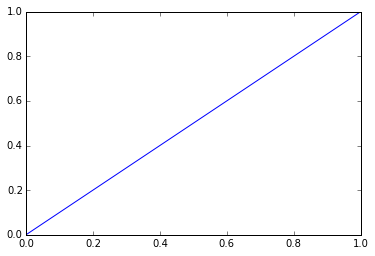

In [32]:
#Cross Validation
# We would like to create out training set 
n = int(len(default_output) * 0.7)
# Stack array in sequence horizointally with hstack
ind = np.hstack( (np.ones(n, dtype=np.bool), np.zeros(len(default_output) - n, dtype=np.bool) ) )
np.random.shuffle(ind)
# we can create our training and testing set 
X_train, X_test = my_input[ind], my_input[ind==False]
Y_train, Y_test = default_output[ind], default_output[ind==False]
# Let us do the magic!
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test) 
#Application of cross validation
#The work in class showed that with 21 neighbors, we can get an 
#ideal result that doesnt overfit the data. To verify this, we'll use 
#cross validation
scores=[]
#for k in range(5):
k=1
np.random.shuffle(ind)
X_train, X_test = my_input[ind],my_input[ind==False]
Y_train, Y_test = default_output[ind],default_output[ind==False]
knn.fit(X_train, Y_train)
scores.append(knn.score(X_test, Y_test))
predictionstest = knn.predict_proba(my_inputtest)[:,1]
submission = DataFrame({'Id':borrowerstest.icol(0), 'Probability':predictionstest})
submission.to_csv('EntryKnn'+str(k)+'.csv', index=False)
y_pred = knn.predict(my_input)
print metrics.confusion_matrix(default_output, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(default_output, y_pred)
plt.plot(fpr, tpr)
scores